# Loading libraries required for research analysis

In [1]:
import pandas as pd
import numpy as np
import nltk
import sys
#nltk.download('vader_lexicon')
import codecs
import re
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

Common variables and method for the entire program

In [2]:
## Common variables across the program
sns.set_theme(style="whitegrid")
colorPalette = "coolwarm"
excelFile =  r"D:\UWE\Disseratation\Upload\Python_Code\dream_market_cocaine_listings.xlsx" 
datafolder  = r"D:\UWE\Disseratation\Upload\Python_Code"
nicknames = []
colorPaletteList = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9','#C1F0F6', '#0099CC']

In [3]:
# Common methods to disaply summary of structure and summary
defaultTitle = "Msc Project Analysis"
def printSectionTitle(text):
    print("\n" + text + "\n{}".format("-"*100))
    
def printNewLine():
    print("\n")

def printSepratorLine():
    print("{}".format("-"*100))

def printDatasetShape(dataset, datasetTitle):
    printSectionTitle("Summary of {} Dataset".format(datasetTitle))#  + datasetTitle +" Dataset"
    print("Total Attributes: {}".format(dataset.shape[1]))
    print("Total Observations: {}".format(dataset.shape[0]))
    printSepratorLine()

def printDatasetInfo(dataset, datasetTitle):
    printSectionTitle("{} Dataset Details".format(datasetTitle))
    print(dataset.info())
    printSepratorLine()

def printDatasetNullSummary(dataset, datasetTitle):
    ## Check for Total Number of missing values
    printSectionTitle("{} Dataset Missing Values Summary".format(datasetTitle))    
    print(dataset.isnull().sum())    
    printSepratorLine()
    
def printDataFrameSummary(dataset, datasetTitle = defaultTitle):
    ## drop extra column
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', inplace=True, axis=1)
    
    printDatasetShape(dataset, datasetTitle)
    printDatasetInfo(dataset, datasetTitle)    
    printDatasetNullSummary(dataset, datasetTitle)

In [4]:
## write data frame to excel file
import os
from datetime import date
import time

def writeToExcel(df, caption ="cleandata"):
    timestr = time.strftime("%Y%m%d_%H%M%S")
    fileOutURL = os.path.join(datafolder, 'cleandata_{}.xlsx'.format(timestr))
    df.to_excel(fileOutURL, sheet_name=caption)
    print("File created at path : {}".format(fileOutURL))
    return True

def writeToTextFile(df, columnName):
    timestr = time.strftime("%Y%m%d_%H%M%S")

    fileOutURL = os.path.join(datafolder, 'cleandata_{}.txt'.format(timestr))
    with open(fileOutURL, 'w', encoding="utf-8") as f:
            for tweet in df[columnName]:
                f.write(tweet.strip() + '\n')
    print("File created at path : {}".format(fileOutURL))
    return True

Read the dataset excel file and initial dataset exploration

In [5]:
## read excel file
df = pd.read_excel(excelFile)
printDataFrameSummary(df)
df.head()


Summary of Msc Project Analysis Dataset
----------------------------------------------------------------------------------------------------
Total Attributes: 63
Total Observations: 1504
----------------------------------------------------------------------------------------------------

Msc Project Analysis Dataset Details
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_title            1504 non-null   object 
 1   ships_from_to            1504 non-null   object 
 2   grams                    1504 non-null   float64
 3   quality                  1504 non-null   float64
 4   btc_price                1504 non-null   float64
 5   cost_per_gram            1504 non-null   float64
 6   cost_per_gram_pure       150

,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,vendor_link,...,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,NL â†’ EU,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,...,False,False,False,False,False,False,False,False,False,False
1,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,NL â†’ EU,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,...,False,False,False,False,False,False,False,False,False,False
2,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,NL â†’ EU,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,...,False,False,False,False,False,False,False,False,False,False
3,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,FR â†’ EU,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,...,False,False,False,False,False,False,False,False,False,False
4,** 1 Gram 87% Pure Uncut Colombian Cocaine **,NL â†’ WW,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,...,False,False,False,False,False,False,False,False,False,False


Identifying key variables for the research and creating a subset dataset with important variables

In [6]:
keyColumns =['product_title', 'grams', 'quality', 'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow', 'product_link'
,'vendor_link', 'vendor_name', 'successful_transactions','rating']
splitRowColumns =['ships_from', 'ships_to']
mainColumns =  set().union(keyColumns, splitRowColumns) 

In [7]:
df['ships_from'] = df['ships_from'].astype('string')
df['ships_to'] = df['ships_to'].astype('string')

research_df = df[mainColumns]
research_df["record_id"] = research_df.index + 1

<ipython-input-7-a99a25ab06aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  research_df["record_id"] = research_df.index + 1


In [8]:
printDataFrameSummary(research_df)


Summary of Msc Project Analysis Dataset
----------------------------------------------------------------------------------------------------
Total Attributes: 15
Total Observations: 1504
----------------------------------------------------------------------------------------------------

Msc Project Analysis Dataset Details
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   escrow                   1504 non-null   int64  
 1   ships_from               1504 non-null   string 
 2   successful_transactions  1504 non-null   int64  
 3   btc_price                1504 non-null   float64
 4   grams                    1504 non-null   float64
 5   product_link             1504 non-null   object 
 6   product_title            150

Checking comma seperated value for Ship from and To columns to split column values into multiple rows

In [9]:
def columnContainsValue(df, columnName, value =','):
    return len(df[df[columnName].str.contains(',')])

print(columnContainsValue(df, 'ships_from', ',') > 0)
print(columnContainsValue(df, 'ships_to', ',') > 0)

False
True


In [10]:
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

def splitColumnToRows(df, columnName):
    # calculate lengths of splits
    lens = df[columnName].str.split(',').map(len)
    
    # create new dataframe, repeating or chaining as appropriate
    result = pd.DataFrame({
        'record_id': np.repeat(df['record_id'], lens),
        'product_title': np.repeat(df['product_title'], lens),
        'grams': np.repeat(df['grams'], lens),
        'quality': np.repeat(df['quality'], lens),
        'btc_price': np.repeat(df['btc_price'], lens),
        'cost_per_gram': np.repeat(df['cost_per_gram'], lens),
        'cost_per_gram_pure': np.repeat(df['cost_per_gram_pure'], lens),
        'escrow': np.repeat(df['escrow'], lens),
        'product_link': np.repeat(df['product_link'], lens),
        'vendor_link': np.repeat(df['vendor_link'], lens),
        'vendor_name': np.repeat(df['vendor_name'], lens),
        'successful_transactions': np.repeat(df['successful_transactions'], lens),
        'rating': np.repeat(df['rating'], lens),
        'ships_from': np.repeat(df['ships_from'], lens),
         columnName: chainer(df[columnName])
    })
    
    return result.reset_index()
    
new_research_df = (splitColumnToRows(research_df,'ships_to'))

Verifying new dataset

In [11]:
new_research_df
printDataFrameSummary(new_research_df)


Summary of Msc Project Analysis Dataset
----------------------------------------------------------------------------------------------------
Total Attributes: 16
Total Observations: 2001
----------------------------------------------------------------------------------------------------

Msc Project Analysis Dataset Details
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    2001 non-null   int64  
 1   record_id                2001 non-null   int64  
 2   product_title            2001 non-null   object 
 3   grams                    2001 non-null   float64
 4   quality                  2001 non-null   float64
 5   btc_price                2001 non-null   float64
 6   cost_per_gram            200

Clean the text for the further analysis to identify the product title and drugs are invovled in darknet web for Illegal selling

In [12]:
def cleanText(x):
    return (alphaCharsOnly(removeSingleSpaceInWord(removePercentage(removeGram(x['product_title'])))))

def alphaCharsOnly(textValue):    
    return re.sub(r"[^a-zA-Z]+", ' ', str(textValue))

def removeGram(textValue):
    return re.sub(r"[0-9.]+(gram|gr|gm|g)", ' ', str(textValue).lower())

def removePercentage(textValue):
    return re.sub(r"(?:\d+%)|(?:\d+\.\d+%)", ' ', str(textValue))

def removeSingleSpaceInWord(textValue):
    pattern = re.compile(r'\b([a-z]) (?=[a-z]\b)', re.I)
    textValue = re.sub(pattern, r'\g<1>', textValue)
    return textValue

new_research_df['product_title_clean'] = new_research_df.apply(cleanText, axis=1)
new_research_df

,index,record_id,product_title,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,vendor_link,vendor_name,successful_transactions,rating,ships_from,ships_to,product_title_clean
0,0,1,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,Mister-Molly,90,4.63,NL,EU,intro offer cocaine
1,1,2,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,Mister-Molly,90,4.63,NL,EU,intro offer cocaine
2,2,3,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,0ldamsterdamm,620,4.94,NL,EU,intro cocaine straight from the b
3,3,4,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,lhomme-masquer,15,5.00,FR,EU,colombiancocaine purity
4,4,5,** 1 Gram 87% Pure Uncut Colombian Cocaine **,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,SMOOTHCRIMINAL007,28,4.78,NL,WW,gram pure uncut colombian cocaine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1501,1502,âœ¯50g FLAKES COCAINE 92% âœ¯GAâœ¯,50.0,92.0,1.10800,0.02216,0.024087,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,US,flakes cocaine ga
1997,1502,1503,âœ¯5g FLAKES COCAINE 92% âœ¯GAâœ¯,5.0,92.0,0.12360,0.02472,0.026870,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,WW,flakes cocaine ga
1998,1502,1503,âœ¯5g FLAKES COCAINE 92% âœ¯GAâœ¯,5.0,92.0,0.12360,0.02472,0.026870,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,US,flakes cocaine ga
1999,1503,1504,âœ¯750g FLAKES COCAINE 92% âœ¯GAâœ¯,750.0,92.0,12.75000,0.01700,0.018478,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,WW,flakes cocaine ga


Bag of words identification to identify most used words

In [13]:
#Word Cloud : most commonly used words
themeStopWords  = ['INTRO', 'OFFER', 'PURE','UNCUT' 'COLOMBIAN', 'GRAM', 'FLAKES', 'GA','purity', 'uncut']

def getCustomStopwordList():
    swords = set().union(stopwords.words('english'), themeStopWords)
    swords = [each_string.lower() for each_string in swords]
    return swords

def isStopwordOrNumber(word, stopWordsList):
    if word.lower() in stopWordsList:
        return True
    elif word.isnumeric():
        return True
    else:
        return len(word) < 2 
    
def getWordCloudTextColumn(df, colName):    
    sWords = getCustomStopwordList()    
    df['WordCloudText'] = df[colName].str.lower().apply(lambda x: [i for i in x.split() 
                                                                            if not isStopwordOrNumber(i, sWords)])
    return df


def getWordsforWordCloud(df):
    dfWordCloud = df.loc[df['WordCloudText'].apply(lambda wordsList: wordsList !=[]),['WordCloudText']]
    
    dfWords = pd.DataFrame([word for wordsList 
                                in dfWordCloud.WordCloudText 
                                for word in wordsList],columns=['word'])
    
    wordsCloud = dfWords.groupby('word').size().reset_index(
        name='counts').sort_values('counts', ascending=False).reset_index(drop=True)

    return wordsCloud

new_research_df = getWordCloudTextColumn(new_research_df, 'product_title_clean')
wordsCloud = getWordsforWordCloud(new_research_df)


In [14]:
wordsCloud.head(50)

,word,counts
0,cocaine,1767
1,colombian,392
2,quality,280
3,fishscale,274
4,gr,255
5,peruvian,248
6,flake,127
7,peru,123
8,grams,116
9,high,87


In [15]:
new_research_df

,index,record_id,product_title,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,vendor_link,vendor_name,successful_transactions,rating,ships_from,ships_to,product_title_clean,WordCloudText
0,0,1,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,Mister-Molly,90,4.63,NL,EU,intro offer cocaine,[cocaine]
1,1,2,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,Mister-Molly,90,4.63,NL,EU,intro offer cocaine,[cocaine]
2,2,3,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,0ldamsterdamm,620,4.94,NL,EU,intro cocaine straight from the b,"[cocaine, straight]"
3,3,4,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,lhomme-masquer,15,5.00,FR,EU,colombiancocaine purity,[colombiancocaine]
4,4,5,** 1 Gram 87% Pure Uncut Colombian Cocaine **,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,SMOOTHCRIMINAL007,28,4.78,NL,WW,gram pure uncut colombian cocaine,"[colombian, cocaine]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1501,1502,âœ¯50g FLAKES COCAINE 92% âœ¯GAâœ¯,50.0,92.0,1.10800,0.02216,0.024087,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,US,flakes cocaine ga,[cocaine]
1997,1502,1503,âœ¯5g FLAKES COCAINE 92% âœ¯GAâœ¯,5.0,92.0,0.12360,0.02472,0.026870,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,WW,flakes cocaine ga,[cocaine]
1998,1502,1503,âœ¯5g FLAKES COCAINE 92% âœ¯GAâœ¯,5.0,92.0,0.12360,0.02472,0.026870,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,US,flakes cocaine ga,[cocaine]
1999,1503,1504,âœ¯750g FLAKES COCAINE 92% âœ¯GAâœ¯,750.0,92.0,12.75000,0.01700,0.018478,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,WW,flakes cocaine ga,[cocaine]


Generating a word cloud representation of most used words

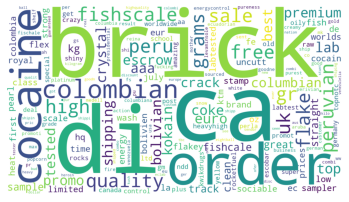

In [16]:
import imageio


## Word cloud related
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

#twitterMask = imageio.imread('twitterMask.png')

wordText = " ".join(wordsCloud['word'])

wordcloud = WordCloud(
                      stopwords= getCustomStopwordList(),
                      background_color='white',
                      width=1920,
                      height=1080
                      ##,mask=twitterMask
            ).generate(wordText)

plt.imshow(wordcloud)
plt.axis("off")
#plt.figure(figsize=(16, 16))

timestr = time.strftime("%Y%m%d_%H%M%S")
plt.savefig('WordCloud_{}.png'.format(timestr), dpi=300)
plt.show()

Extracting noun phrase from the product title to get the drugs name

In [17]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
import pandas as pd

# Defining a grammar & Parser
NP = "NP: {(<V\w+>|<NN\w?>)+.*<NN\w?>}"
chunker = RegexpParser(NP)

def get_continuous_chunks(text, chunk_func=ne_chunk):
    chunked = chunk_func(pos_tag(word_tokenize(text)))
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == Tree:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    return continuous_chunk

def get_nouns(x):
    return (get_noun_phrases(x['product_title_clean']))

def get_noun_phrases(text):
    pos = pos_tag(word_tokenize(text))
    count = 0
    half_chunk = ""
    for word, tag in pos:
        if re.match(r"NN.*", tag):
            count+=1
            if count>=1:
                half_chunk = half_chunk + word + " "
        else:
            half_chunk = half_chunk+"---"
            count = 0
    half_chunk = re.sub(r"-+","?",half_chunk).split("?")
    half_chunk = [x.strip() for x in half_chunk if x!=""]
    return half_chunk

new_research_df['product_noun'] = new_research_df['product_title_clean'].apply(lambda sent: get_continuous_chunks(sent, chunker.parse))
new_research_df['product_noun1'] = new_research_df.apply(get_nouns, axis=1)

In [18]:
new_research_df

,index,record_id,product_title,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,vendor_link,vendor_name,successful_transactions,rating,ships_from,ships_to,product_title_clean,WordCloudText,product_noun,product_noun1
0,0,1,!!!!!INTRO OFFER!!!!! 1GR COCAINE 90%,1.0,90.0,0.02577,0.02577,0.028633,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,Mister-Molly,90,4.63,NL,EU,intro offer cocaine,[cocaine],[],[intro offer cocaine]
1,1,2,!!!!!INTRO OFFER!!!!! 2GR COCAINE 90%,2.0,90.0,0.05150,0.02575,0.028611,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,Mister-Molly,90,4.63,NL,EU,intro offer cocaine,[cocaine],[],[intro offer cocaine]
2,2,3,!!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...,0.5,89.0,0.01649,0.03298,0.037056,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,0ldamsterdamm,620,4.94,NL,EU,intro cocaine straight from the b,"[cocaine, straight]",[cocaine straight],"[cocaine straight, b]"
3,3,4,!1G! C O L O M B I A N C O C A I N E - 89% PURITY,1.0,89.0,0.04120,0.04120,0.046292,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,lhomme-masquer,15,5.00,FR,EU,colombiancocaine purity,[colombiancocaine],[],[colombiancocaine purity]
4,4,5,** 1 Gram 87% Pure Uncut Colombian Cocaine **,1.0,87.0,0.03400,0.03400,0.039080,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,SMOOTHCRIMINAL007,28,4.78,NL,WW,gram pure uncut colombian cocaine,"[colombian, cocaine]",[],"[pure, cocaine]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1501,1502,âœ¯50g FLAKES COCAINE 92% âœ¯GAâœ¯,50.0,92.0,1.10800,0.02216,0.024087,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,US,flakes cocaine ga,[cocaine],[],"[flakes, ga]"
1997,1502,1503,âœ¯5g FLAKES COCAINE 92% âœ¯GAâœ¯,5.0,92.0,0.12360,0.02472,0.026870,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,WW,flakes cocaine ga,[cocaine],[],"[flakes, ga]"
1998,1502,1503,âœ¯5g FLAKES COCAINE 92% âœ¯GAâœ¯,5.0,92.0,0.12360,0.02472,0.026870,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,US,flakes cocaine ga,[cocaine],[],"[flakes, ga]"
1999,1503,1504,âœ¯750g FLAKES COCAINE 92% âœ¯GAâœ¯,750.0,92.0,12.75000,0.01700,0.018478,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,WW,flakes cocaine ga,[cocaine],[],"[flakes, ga]"


In [19]:
## write data to excel file 
writeToExcel(new_research_df)

File created at path : D:\UWE\Disseratation\Upload\Python_Code\cleandata_20211228_224616.xlsx


True

# # Data EDA

In [20]:
def drawBarPlot(df, xAxis, yAxis, graphTitle, xAxisLabel, yAxisLabel, xtickLabel = 0, ytickLabel=0, customColorPal=[]):
    plt.figure(figsize=(10, 6))

    barGraphColorPalette = colorPalette
    
    if(len(customColorPal) > 0):
        barGraphColorPalette = customColorPal
        
    splot=sns.barplot(x= xAxis, y=yAxis, data=df, palette= barGraphColorPalette) # 
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

    plt.xlabel(xAxisLabel, size=14)
    plt.ylabel(yAxisLabel, size=14)
    plt.title(graphTitle, size=14)

    for item in splot.get_xticklabels():
        item.set_rotation(xtickLabel)
    
    for item in splot.get_yticklabels():
        item.set_rotation(ytickLabel)
    
    plt.show()

The Number Of Shipment Dispatched From Country Analysis

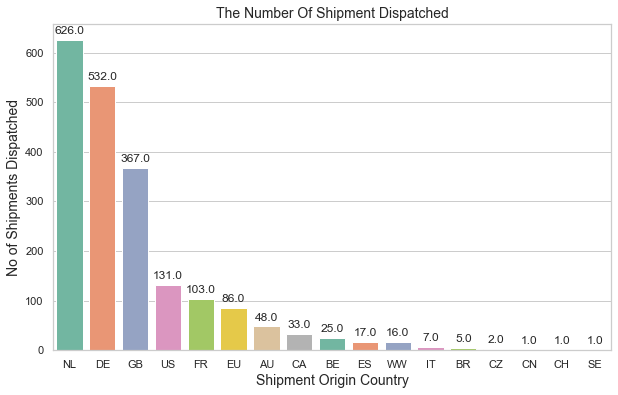

In [21]:
shipFromStats = new_research_df.groupby(['ships_from'],as_index=False).agg(
    {'record_id': 'count'}).rename(columns ={'ships_from': 'ships_from',
                                                               'record_id': 'NoOfShipmentFrom'})

drawBarPlot(shipFromStats.sort_values("NoOfShipmentFrom", ascending=False), 'ships_from', 'NoOfShipmentFrom'
            , 'The Number Of Shipment Dispatched','Shipment Origin Country', 'No of Shipments Dispatched' ,customColorPal='Set2')



The Number Of Shipment Brought To Country Analysis

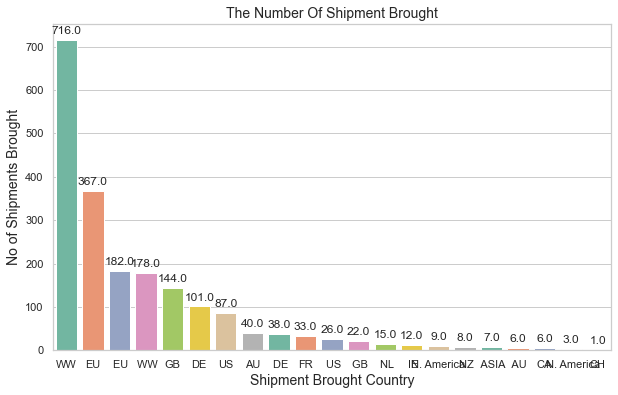

In [22]:
shipFromStats = new_research_df.groupby(['ships_to'],as_index=False).agg(
    {'record_id': 'count'}).rename(columns ={'ships_to': 'ships_to',
                                                               'record_id': 'NoOfShipmentFrom'})

drawBarPlot(shipFromStats.sort_values("NoOfShipmentFrom", ascending=False), 'ships_to', 'NoOfShipmentFrom'
            , 'The Number Of Shipment Brought','Shipment Brought Country', 'No of Shipments Brought' ,customColorPal='Set2')